<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_05_ABC_Modelo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# Problema:

El dataset de casas de California. Es un conjunto de datos que contiene información sobre los precios medios de las viviendas y otras características de los distritos de California, basado en el censo de 1990.



**longitude**: es la longitud del centroide del distrito, expresada en grados. Esta variable indica la posición geográfica del distrito en el mapa.

**latitude**: es la latitud del centroide del distrito, expresada en grados. Esta variable también indica la posición geográfica del distrito en el mapa.

**housing_median_age**: es la edad media de las casas en el distrito, expresada en años. Esta variable refleja el estado y la antigüedad de las viviendas en el distrito.

**total_rooms**: es el número total de habitaciones en el distrito, sin distinguir entre tipos de habitaciones. Esta variable refleja el tamaño y la capacidad de las viviendas en el distrito.

**total_bedrooms**: es el número total de dormitorios en el distrito. Esta variable refleja el número de espacios destinados al descanso en las viviendas del distrito.

**population**: es el número de personas que viven en el distrito. Esta variable refleja la densidad y la demanda de vivienda en el distrito.


**households**: es el número de hogares en el distrito. Un hogar es un grupo de personas que residen dentro de una casa. Esta variable refleja la estructura y la composición de las familias en el distrito.


**median_income**: es el ingreso medio por hogar en el distrito, expresado en miles de dólares ($1000). Esta variable refleja el nivel socioeconómico y el poder adquisitivo de los habitantes del distrito.


**median_house_value**: es el valor medio de las casas en el distrito, expresado en cientos de miles de dólares ($100,000). Esta variable es la variable objetivo que se quiere predecir. Refleja el precio y la calidad de las viviendas en el distrito.


# 1.0 Análisis del data frame

1. Leer el data frame en formato csv en la dirección https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv

2. Entender  el estado de los datos, para ello puedo emplear los comandos básicos del pandas

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```
Estos dos últimos son equivalentes.

3. Determinar los elementos únicos dentro de la columna ocean_proximity.


4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.


5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

### [Diagrama de caja](https://en.wikipedia.org/wiki/Box_plot)


### Diagrama de caja

![box](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)



### Interpretación de un diagrama de caja

- Desde el minimo al valor más bajo de la caja: primer cuartil, 25% de los datos
- Desde el valor más bajo de la caja hasta la mediana: segundo cuartil, 25% de los datos
- Desde la mediana hasta el valor mas alto de la caja : tercer cuartil, 25% de los datos
- Desde el valor mas alto de la caja hasta el máximo: Cuarto  cuartil, 25% de los datos


El rango intercuartil $IQR = Q_3-Q_1$ permite definir que datos pueden ser atípicos, basado en los siguientes limites:

$Max = Q3 + 1.5IQR$

$Min = Q1 - 1.5IQR$



El cuartil puede ser determinado como sigue:

Para calcular los cuartiles de una lista de números:

- Ordenar los números de menor a mayor.
- Calcular la posición de cada cuartil usando la fórmula: Q = a (N+1) / 4, donde Q es la posición del cuartil, a es el número del cuartil (1, 2 o 3), y N es el número total de datos.
- Si la posición del cuartil es un número entero, el valor del cuartil es el dato que está en esa posición.
- Si la posición del cuartil es un número decimal, el valor del cuartil se interpola usando la fórmula: Q = x + d (y - x), donde Q es el valor del cuartil, x es el dato anterior a la posición del cuartil, y es el dato posterior a la posición del cuartil, y d es la parte decimal de la posición del cuartil.


Veamos un ejemplo:



In [2]:
T = np.array([52, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89])
Tsort = np.sort(T)
print(len(T))
print(f"T sort:{Tsort}")
len(T)/4

24
T sort:[52 57 57 58 63 66 66 67 67 68 69 70 70 70 70 72 73 75 75 76 76 78 79 89]


6.0

88.5
52.5


{'whiskers': [<matplotlib.lines.Line2D at 0x7f94f6348d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f94f6349930>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f94f63494b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f94f6348910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f94f63496c0>],
 'means': []}

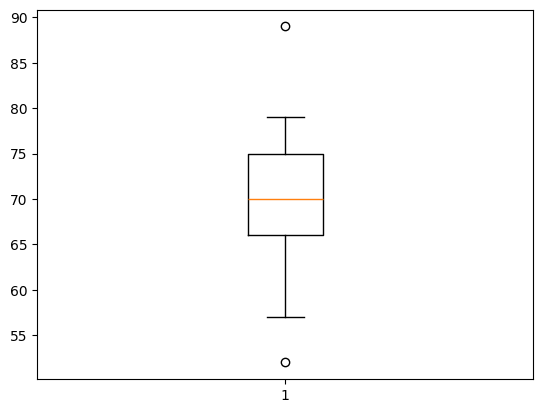

In [3]:

IQR=9
max_ = 75 + 1.5*IQR
min_ = 66 - 1.5*IQR
print(max_)
print(min_)
plt.boxplot(T)

7. Empleando el siguiente código realiza el gráfico boxplot,
```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()
```

8. Determina la matrix de correlación.

### [Matrix de correlación](https://en.wikipedia.org/wiki/Correlation)

¿Como se determina la matrix de correlación?

![Matrix de correlación](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)



```python
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()
```

9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

10. Realizaun scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

#2.0 Preparacion del data frame

## Evitar el data *Snooping bias*.

En algunos casos se sugiere dividir los datos en entrenamiento y test desde el principio dado que el cerebro puede sobreajustar el dataset y los resultados no significativos se pueden volver significativos. El procedimiento correcto es probar cualquier hipótesis en un conjunto de datos que no se utilizó para generar las hipótesis inicial.


## *Sampling bias*

Si el dataset es lo suficientemente grande un muestreo aleatorio de la muestra puede ser considerado, sin embargo si la muestra es pequena se debe garantizar homegeniedad en el dataset de entrenamiento.


Ejemplo:

Por ejemplo, la población de EE. UU. esta compuesto por un 51,3 % de mujeres y un 48,7 % de hombres, por lo que una encuesta bien realizada en EEUU
trata de mantener esta proporción en la muestra: 513 mujeres y 487 hombres. Esto se llama muestreo estratificado(stratified sampling): la población se divide en subgrupos homogéneos llamados estratos(strata), y se muestrea el número correcto de instancias de cada estrato para garantizar que el
El conjunto de prueba es representativo de la población general. Si usaran muestras puramente aleatorias, habría alrededor del 12% de posibilidades de muestrear un conjunto de prueba sesgado con menos del 49% de mujeres o más del 54% de mujeres. De cualquier manera, los resultados de la encuesta serían
significativamente sesgada.


11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```


12. División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()


```

La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

```


Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)
```

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```

13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:
```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```




# Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

```python

df.isnull().sum()


#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

```

##imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):


```python
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_
```

14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```


# Manejo de texto y atributos categóricos
15.  ¿Qué realizan las siguientes lineas de código?

```
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```


# Escalamiento de variables

16. Las variables pueden ser escaladas como sigue:

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```


17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

1. ¿que puede concluir respecto al modelo empleado?
2. ¿El modelo de regresión lineal es valido para lo construido,
3. ¿qué informacion nos da el score?
4. ¿Puede ser ajustado a otro modelo?
5. ¿Como puede autmatizar todo el proceso empleando pipelines?






1. Leer el data frame en formato csv en la dirección https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv

2. Entender  el estado de los datos, para ello puedo emplear los comandos básicos del pandas

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv")
df =data
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
df.info()
df.describe()
df.isnull().sum()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


3. Determinar los elementos únicos dentro de la columna ocean_proximity.


4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.


In [6]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [7]:
cols = ["housing_median_age",    "total_rooms",    "total_bedrooms",    "population",    "households",    "median_income",    "median_house_value"]
df.groupby("ocean_proximity")[cols].mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

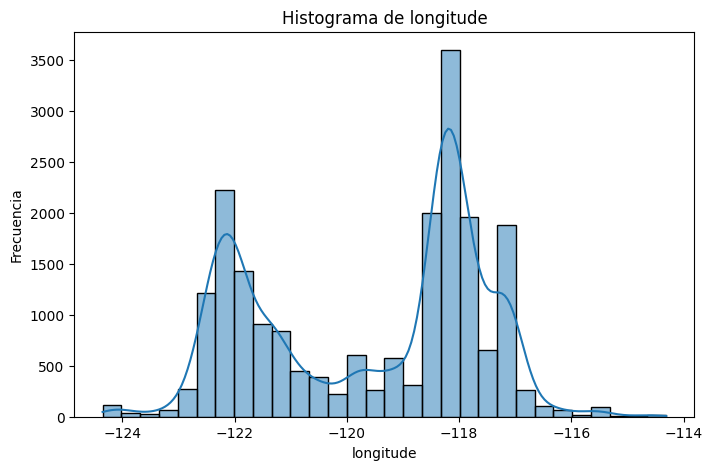

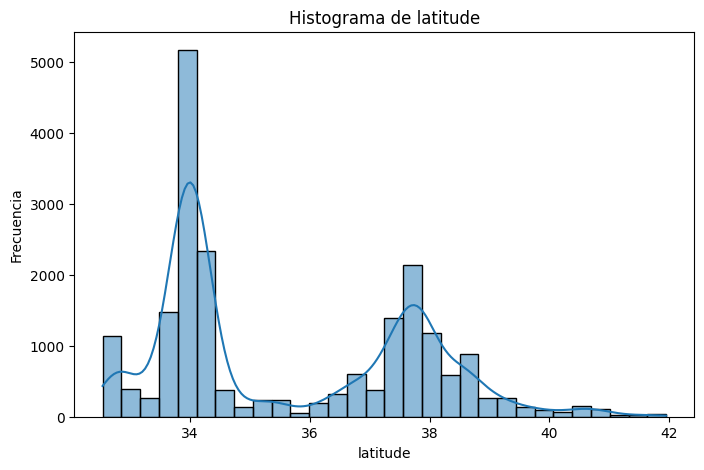

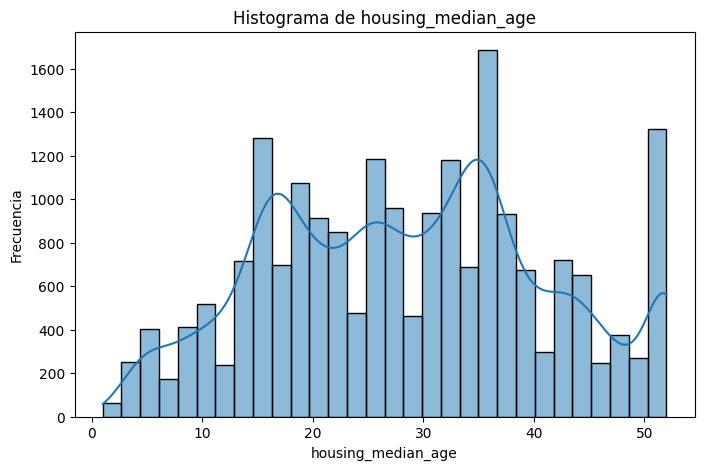

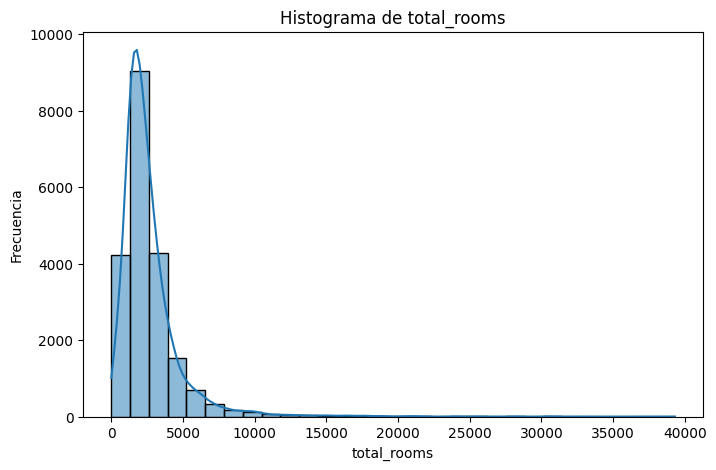

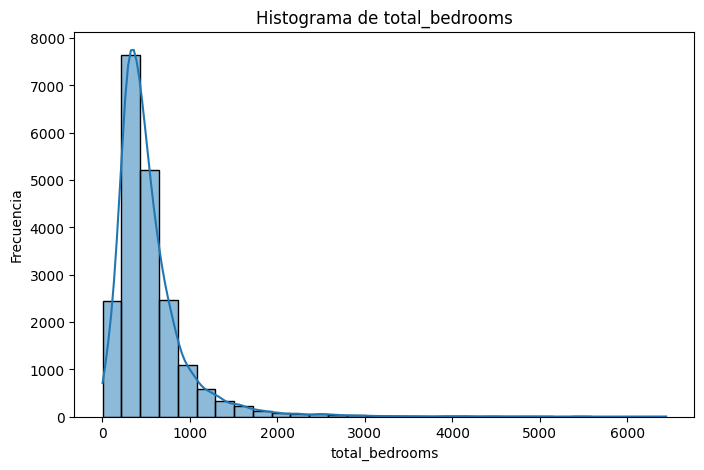

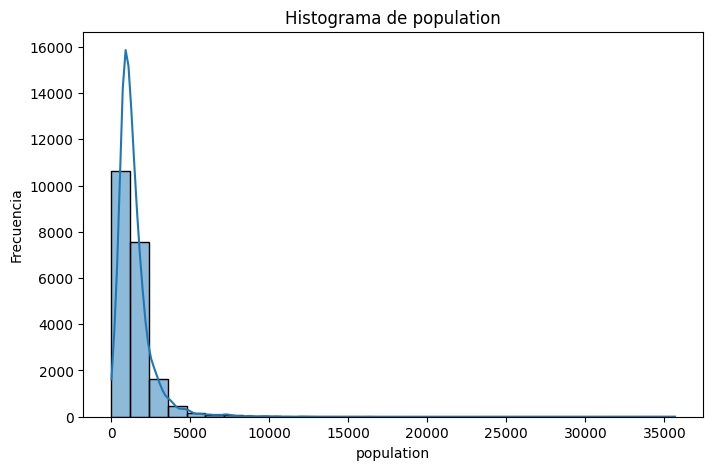

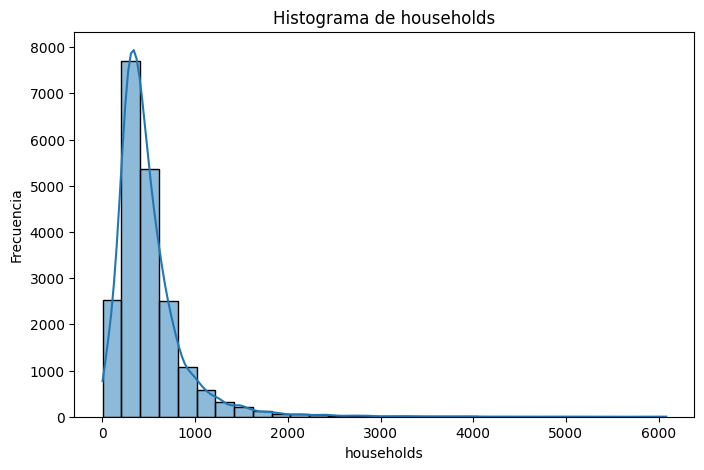

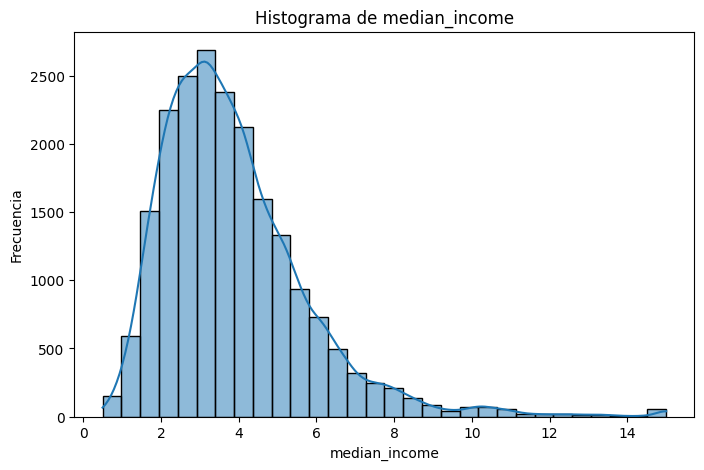

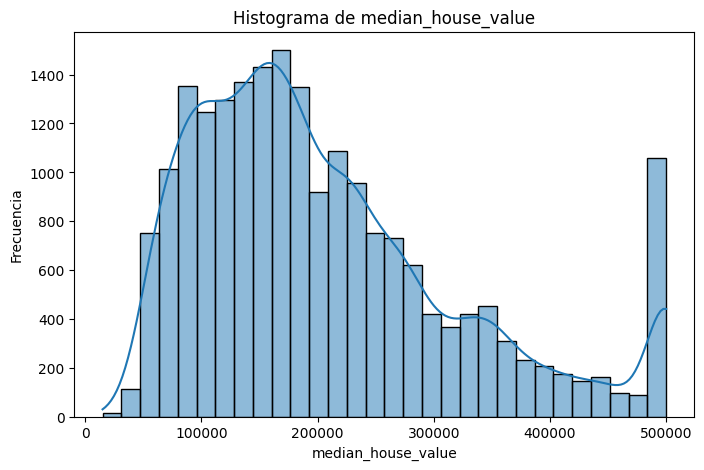

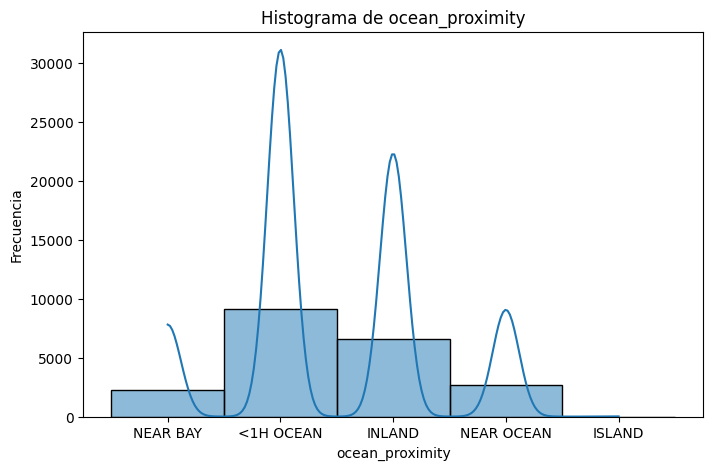

In [8]:
for column in df.columns:
  plt.figure(figsize=(8, 5))
  sns.histplot(df[column], bins=30, kde=True)
  plt.title(f'Histograma de {column}')
  plt.xlabel(column)
  plt.ylabel('Frecuencia')
  plt.show()

### Interpretación de un diagrama de caja

- Desde el minimo al valor más bajo de la caja: primer cuartil, 25% de los datos
- Desde el valor más bajo de la caja hasta la mediana: segundo cuartil, 25% de los datos
- Desde la mediana hasta el valor mas alto de la caja : tercer cuartil, 25% de los datos
- Desde el valor mas alto de la caja hasta el máximo: Cuarto  cuartil, 25% de los datos


El rango intercuartil $IQR = Q_3-Q_1$ permite definir que datos pueden ser atípicos, basado en los siguientes limites:

$Max = Q3 + 1.5IQR$

$Min = Q1 - 1.5IQR$



El cuartil puede ser determinado como sigue:

Para calcular los cuartiles de una lista de números:

- Ordenar los números de menor a mayor.
- Calcular la posición de cada cuartil usando la fórmula: Q = a (N+1) / 4, donde Q es la posición del cuartil, a es el número del cuartil (1, 2 o 3), y N es el número total de datos.
- Si la posición del cuartil es un número entero, el valor del cuartil es el dato que está en esa posición.
- Si la posición del cuartil es un número decimal, el valor del cuartil se interpola usando la fórmula: Q = x + d (y - x), donde Q es el valor del cuartil, x es el dato anterior a la posición del cuartil, y es el dato posterior a la posición del cuartil, y d es la parte decimal de la posición del cuartil.


24
T sort:[52 57 57 58 63 66 66 67 67 68 69 70 70 70 70 72 73 75 75 76 76 78 79 89]
88.5
52.5


{'whiskers': [<matplotlib.lines.Line2D at 0x7f94f143b4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f94f143ba30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f94f143b250>],
 'medians': [<matplotlib.lines.Line2D at 0x7f94f143bf70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f94f1470250>],
 'means': []}

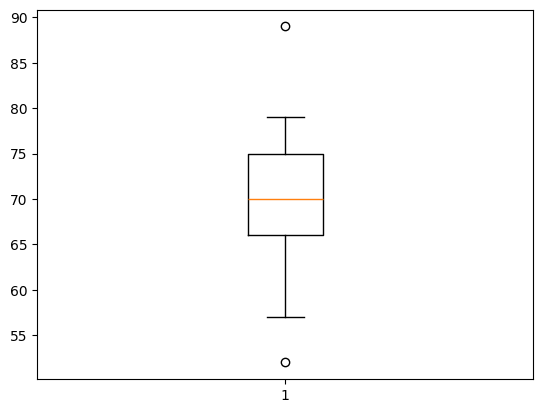

In [9]:
T = np.array([52, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89])
Tsort = np.sort(T)
print(len(T))
print(f"T sort:{Tsort}")
len(T)/4

IQR=9
max_ = 75 + 1.5*IQR
min_ = 66 - 1.5*IQR
print(max_)
print(min_)
plt.boxplot(T)

7. Empleando el siguiente código realiza el gráfico boxplot

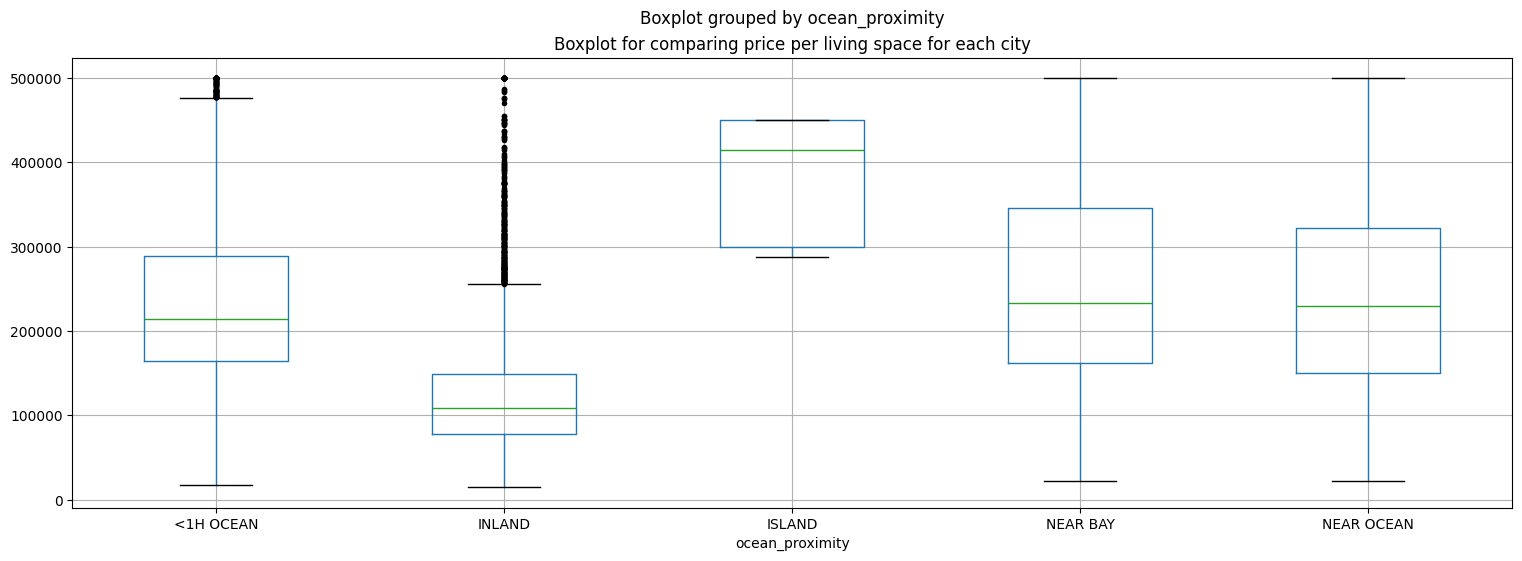

In [10]:
# draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
# set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()

los datos que nos sirven son los datos de ocean_proximity debido a que son los datos que menos incertidumbre tienen, y de esta manera nos ayudan a tener una mejor distribucion de los datos en nuestros graficos.

8. Determina la matrix de correlación.

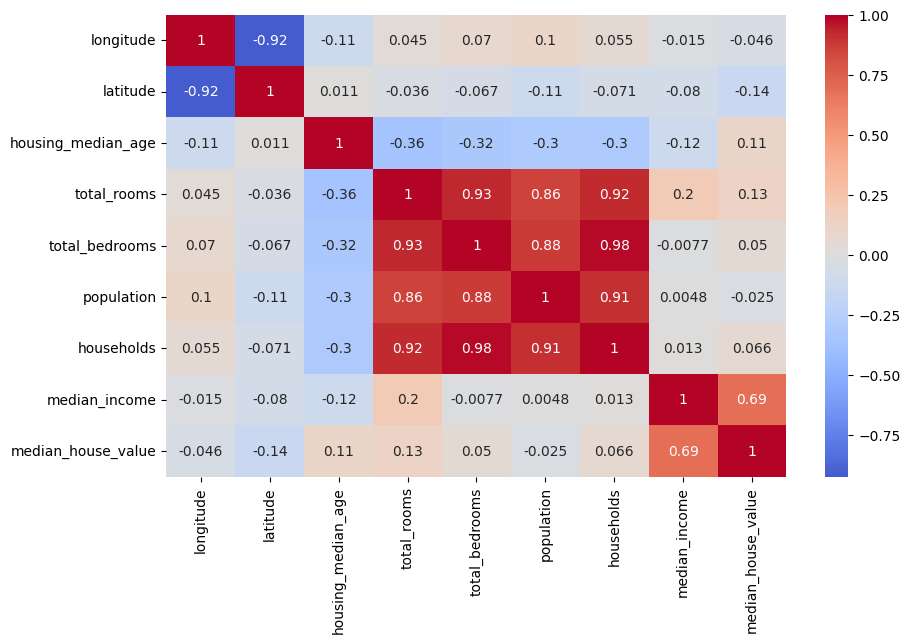

In [11]:
df_limpio = df.select_dtypes(include=[np.number])
corr_matrix = df_limpio.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()

9. Con las columnas, realiza un grafico pairplot empleando seaborn  de python

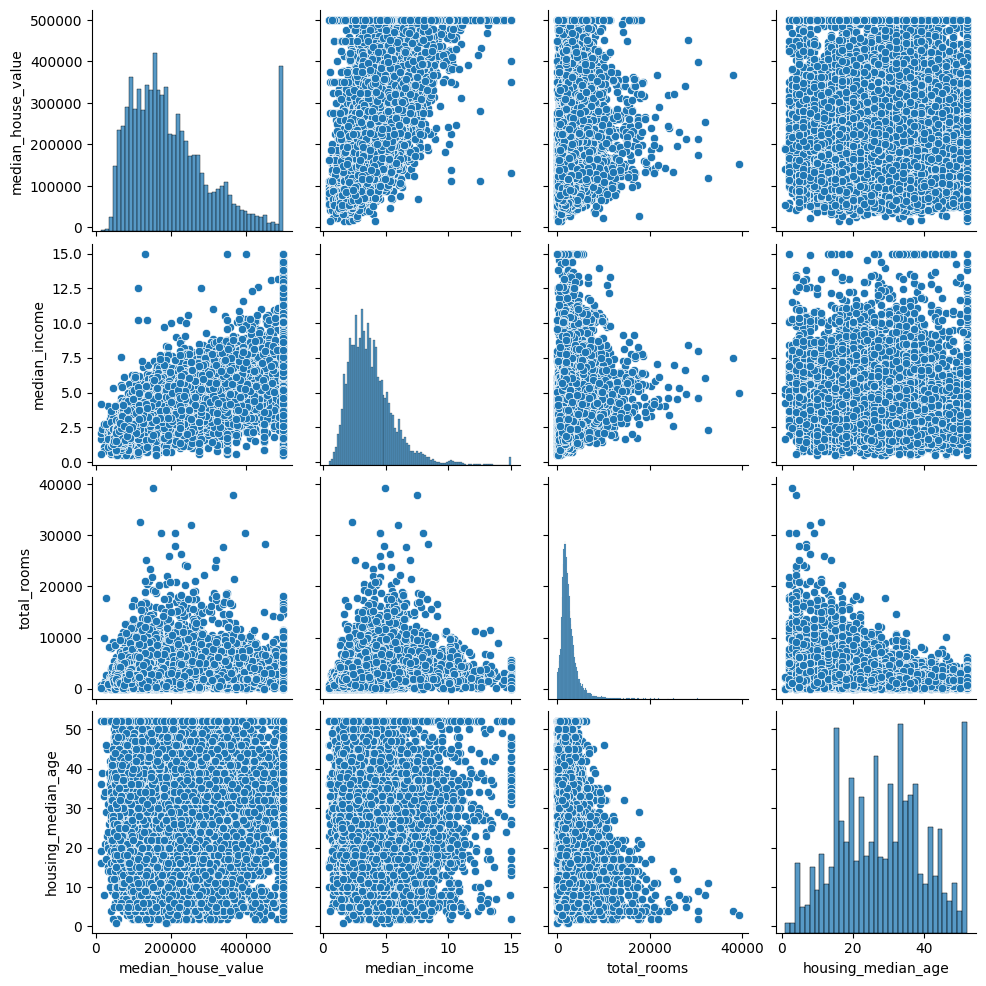

In [12]:
cols = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
df_cols = df[cols]

sns.pairplot(df_cols)
plt.show()

10. Realizaun scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

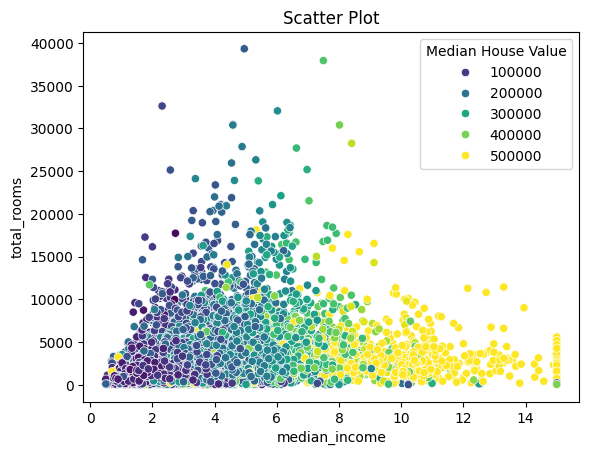

In [13]:
scatter = sns.scatterplot(data=df, x='median_income', y='total_rooms', hue='median_house_value', palette='viridis')
plt.title('Scatter Plot')
plt.legend(title='Median House Value')
plt.show()

11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {len(train_set)}")
print(f"Tamaño del conjunto de prueba: {len(test_set)}")

Tamaño del conjunto de entrenamiento: 16512
Tamaño del conjunto de prueba: 4128


12. División del dataset en grupos:

<Axes: >

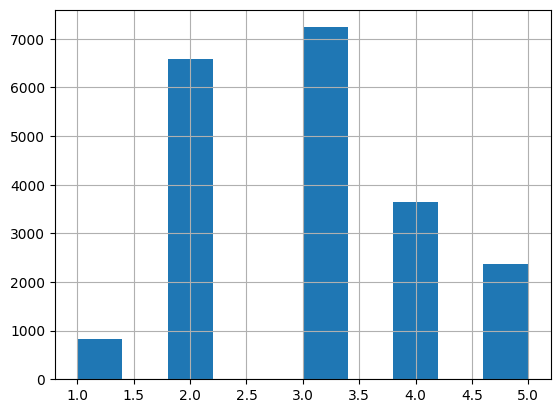

In [15]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()

La forma automatica de realizar la división puede ser la siguiente:

In [16]:
df.reset_index(drop=True, inplace=True)

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

In [18]:
df["income_cat"].value_counts() / len(df)
strat_train_set["income_cat"].value_counts() / len(strat_train_set)
strat_test_set["income_cat"].value_counts() / len(strat_test_set)
train_set, test_set = train_test_split(df, test_size=0.2, random_state=7)
train_set["income_cat"].value_counts() / len(train_set)

,count
income_cat,
3,0.348716
2,0.324188
4,0.173147
5,0.114159
1,0.039789


* Conclusiones sobre las proporciones:
1. Muestreo Estratificado (strat_train_set y strat_test_set): Las proporciones en estos subconjuntos deberían ser muy similares a las proporciones originales de df, ya que el muestreo estratificado se diseñó para mantener la representatividad de cada categoría en ambos subconjuntos.

2. Muestreo Aleatorio (train_set y test_set): En esta división, las proporciones pueden variar con respecto a las del conjunto completo df. Esto se debe a que la selección es aleatoria y no garantiza la misma distribución de cada categoría, especialmente si algunas categorías tienen pocas observaciones en comparación con otras.

In [19]:
def income_cat_proportions(data):
   return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
   "Overall": income_cat_proportions(df),
   "Stratified": income_cat_proportions(strat_test_set),
   "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = abs(100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] = abs(100 * compare_props["Stratified"] / compare_props["Overall"] - 100)

* Análisis de los errores:
1. Rand. %error: Este valor muestra el porcentaje de error de la división aleatoria con respecto al conjunto original. Si los valores son altos, significa que la división aleatoria no mantuvo correctamente las proporciones de income_cat.
2. Strat. %error: Este valor muestra el porcentaje de error de la división estratificada con respecto al conjunto original. Valores bajos indican que la división estratificada representó bien las proporciones de income_cat.

13.

In [21]:
df_train = df_limpio

In [26]:
def calcular_proporciones(df):
    df["habitaciones_por_hogar"] = df["total_rooms"]/df["households"]
    df["dormitorios_por_habitacion"] = df["total_bedrooms"]/df["total_rooms"]
    df["poblacion_por_hogar"] = df["population"]/df["households"]
    return df
df_train = calcular_proporciones(df_train)

In [24]:
def manejar_valores_faltantes(df):
    mediana = df["total_bedrooms"].median()
    dormitorios_completos = df["total_bedrooms"].fillna(mediana)
    return pd.DataFrame(dormitorios_completos)

valores_faltantes = df.isnull().sum()
dormitorios_procesados = manejar_valores_faltantes(df_train)
valores_faltantes_final = dormitorios_procesados.isnull().sum()

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):

In [29]:
from sklearn.impute import SimpleImputer
def imputar_valores(df):
    imputador = SimpleImputer(strategy='mean')
    imputador.fit(df)
    estadisticas = imputador.statistics_
    return estadisticas

estadisticas_imputacion = imputar_valores(df_train)
estadisticas_imputacion

array([-1.19569704e+02,  3.56318614e+01,  2.86394864e+01,  2.63576308e+03,
        5.37870553e+02,  1.42547674e+03,  4.99539680e+02,  3.87067100e+00,
        2.06855817e+05,  5.42899974e+00,  2.13038830e-01,  3.07065516e+00,
        5.42899974e+00,  2.13038830e-01,  3.07065516e+00])

# 14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```

In [35]:
imputador_media = SimpleImputer(strategy='mean')
imputador_media.fit(df_train)


SimpleImputer()

In [38]:
def transformar_datos(df, imputador):
    datos_transformados = imputador.transform(df)
    df_transformado = pd.DataFrame(datos_transformados, columns=df.columns)
    return df_transformado

datos_vivienda = transformar_datos(df_train, imputador_media)
imputador_media.statistics_

array([-1.19569704e+02,  3.56318614e+01,  2.86394864e+01,  2.63576308e+03,
        5.37870553e+02,  1.42547674e+03,  4.99539680e+02,  3.87067100e+00,
        2.06855817e+05,  5.42899974e+00,  2.13038830e-01,  3.07065516e+00,
        5.42899974e+00,  2.13038830e-01,  3.07065516e+00])

In [39]:
df_train.median()

,0
longitude,-118.490000
latitude,34.260000
housing_median_age,29.000000
total_rooms,2127.000000
total_bedrooms,435.000000
population,1166.000000
households,409.000000
median_income,3.534800
median_house_value,179700.000000
rooms_per_household,5.229129


15.  ¿Qué realizan las siguientes lineas de código?

In [46]:
from sklearn.impute import SimpleImputer

imputador = SimpleImputer(strategy='mean')
imputador.fit(df_train)
X = imputador.transform(df_train)
housing_tr = pd.DataFrame(X, columns=df_train.columns)

# Ahora podemos proceder con la codificación one-hot
from sklearn.preprocessing import OneHotEncoder

housing_cat = df[["ocean_proximity"]]
codificador = OneHotEncoder(sparse_output=False)
housing_cat_1hot = codificador.fit_transform(housing_cat)

df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns=codificador.categories_[0])
housing_tr_ = housing_tr.join(df_cat_1hot)



Este código convierte la columna categórica ocean_proximity en valores numéricos utilizando la técnica de codificación one-hot. Para cada categoría única en ocean_proximity, se crea una nueva columna binaria (0 o 1) en el DataFrame. El resultado es que el DataFrame housing_tr contiene tanto las características numéricas originales como las nuevas columnas que indican la presencia de cada categoría en la columna ocean_proximity. Esta transformación es esencial para preparar los datos para algoritmos de machine learning que necesitan entradas numéricas.

Este proceso evita que el modelo interprete erróneamente las categorías como valores ordinales o continuos, ya que cada columna binaria actúa como una "bandera" independiente para cada categoría.

16:

In [47]:
from sklearn.preprocessing import MinMaxScaler
# Definir columnas a escalar
columnas = [
    "longitude", "latitude", "housing_median_age", "total_rooms",
    "total_bedrooms", "population", "households", "median_income",
    "<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"
]

# Seleccionar datos a escalar
datos_a_escalar = housing_tr_[columnas]

# Crear y aplicar el escalador
escalador = MinMaxScaler()
datos_transformados = escalador.fit_transform(datos_a_escalar)

# Crear DataFrame con datos escalados
datos_preparados = pd.DataFrame(datos_transformados, columns=columnas)


17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

In [48]:
from sklearn.model_selection import StratifiedShuffleSplit

df["categoria_ingresos"] = pd.cut(df["median_income"],
                                 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                 labels=[1, 2, 3, 4, 5])

# Realizar el muestreo estratificado
divisor = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for indice_entrenamiento, indice_prueba in divisor.split(df, df["categoria_ingresos"]):
    conjunto_entrenamiento = df.loc[indice_entrenamiento]
    conjunto_prueba = df.loc[indice_prueba]

Eliminar la columna income_cat para no usarla en el análisis final

In [49]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

Separar las características y la etiqueta

In [50]:
# Separar características y etiquetas para entrenamiento
datos_entrenamiento = conjunto_entrenamiento.drop("median_house_value", axis=1)
etiquetas_entrenamiento = conjunto_entrenamiento["median_house_value"].copy()

# Separar características y etiquetas para prueba
datos_prueba = conjunto_prueba.drop("median_house_value", axis=1)
etiquetas_prueba = conjunto_prueba["median_house_value"].copy()


Definir columnas numéricas y categóricas

In [52]:
caracteristicas_numericas = datos_entrenamiento.select_dtypes(include=[np.number]).columns.tolist()
caracteristicas_categoricas = ["ocean_proximity"]

Crear pipelines para preprocesamiento (esto fue realizado con IA)

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler()),
])

# Pipeline para características categóricas
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False)),
])

# Combinación de ambos pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, caracteristicas_numericas),
    ('cat', cat_pipeline, caracteristicas_categoricas),
])

Transformar los datos de entrenamiento y prueba

In [62]:
datos_entrenamiento_preparados = preprocessor.fit_transform(datos_entrenamiento)
datos_prueba_preparados = preprocessor.transform(datos_prueba)


Crear DataFrames finales de características

In [66]:
datos_entrenamiento = pd.DataFrame(datos_entrenamiento_preparados, columns=caracteristicas_numericas + list(preprocessor.named_transformers_['cat'].get_feature_names_out(caracteristicas_categoricas)))
datos_prueba = pd.DataFrame(datos_prueba_preparados, columns=caracteristicas_numericas + list(preprocessor.named_transformers_['cat'].get_feature_names_out(caracteristicas_categoricas)))

Añadir la columna de etiquetas

In [67]:
datos_entrenamiento["median_house_value"] = etiquetas_entrenamiento.values
datos_prueba["median_house_value"] = etiquetas_prueba.values

In [68]:
datos_entrenamiento.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-0.941350,1.347438,0.027564,0.584777,0.638183,0.732602,0.556286,-0.893647,0.0,1.0,0.0,0.0,0.0,72100.0
1,1.171782,-1.192440,-1.722018,1.261467,0.779415,0.533612,0.721318,1.292168,0.0,0.0,0.0,0.0,1.0,279600.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.547672,-0.674675,-0.524407,-0.525434,0.0,1.0,0.0,0.0,0.0,82700.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.038752,-0.467617,-0.037297,-0.865929,0.0,0.0,0.0,0.0,1.0,112500.0
4,0.437431,-0.635818,-0.131489,0.427179,0.270495,0.374060,0.220898,0.325752,1.0,0.0,0.0,0.0,0.0,238300.0


18. ¿Qué puede concluir respecto al modelo empleado?
respuesta: El modelo de regresión lineal es adecuado como punto de partida debido a su simplicidad, facilidad de interpretación y la capacidad de proporcionar una relación directa y clara entre las variables independientes y la dependiente. Además, es eficiente en cuanto a tiempo de computación, lo que lo hace adecuado para análisis preliminares y para obtener una visión general rápida de las tendencias en los datos. En problemas de regresión donde las relaciones entre las variables son aproximadamente lineales, este modelo es muy efectivo y puede ofrecer resultados bastante precisos.

19. ¿El modelo de regresión lineal es valido para lo construido?
respuesta: Exactamente, la regresión lineal es un modelo que se basa en varios supuestos fundamentales para garantizar que los resultados obtenidos sean confiables y válidos. Estos supuestos son cruciales para la efectividad del modelo, y si alguno de ellos no se cumple, los resultados de la regresión pueden ser incorrectos o engañosos.

20. ¿Qué informacion nos da el score?
respuesta: El R² (o score) es una medida que nos dice qué tan bien nuestro modelo está explicando los datos. En otras palabras, nos muestra qué porcentaje de la variabilidad total de la variable dependiente es explicado por el modelo. Si el R² es alto, significa que el modelo está capturando la mayor parte de la información de los datos y, por lo tanto, está haciendo un buen trabajo.

21. ¿Puede ser ajustado a otro modelo?
respuesta:El modelo puede mejorarse con enfoques como regresión polinómica, regularización (Lasso o Ridge) o modelos basados en árboles (Random Forest o Gradient Boosting), que capturan patrones más complejos en los datos.

22. ¿Como puede automatizar todo el proceso empleando pipelines?
respuesta:
Los pipelines automatizan el flujo de trabajo integrando preprocesamiento y entrenamiento en una estructura única, asegurando consistencia y facilitando cambios o ajustes rápidamente. para estose necesita darle unos buenos datos de pruba y de entrenamiento para que pipelines sea adecuado para automatizar el proceso.